<a href="https://colab.research.google.com/github/lipcorrea/Proyecto_AD_Consumo_Energia/blob/main/Proyecto_AD_ConsumoEnergia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadísticas De Energía Y Balances De Países No Pertenecientes A La OCDE

## Consumo de energía eléctrica per cápita (kWh)
Estadísticas de energía y balances de países no pertenecientes a la OCDE; Estadísticas de energía de países de la OCDE, y balances de energía de países de la OCDE.

[Enlace del Dataset](https://datos.bancomundial.org/indicator/EG.USE.ELEC.KH.PC?end=2019&start=1960)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
url = 'https://raw.githubusercontent.com/lipcorrea/Proyecto_AD_Consumo_Energia/main/API_EG.USE.ELEC.KH.PC_DS2_es_csv_v2_834019.csv'
consumo1_ds = pd.read_csv(url)

In [5]:
consumo1_ds.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0,0,0,0,0,0,0,0,0
1,NaN,AFE,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC,0.0,0.0,0.0,0.0,0.0,0.0,...,680.149943,0,0,0,0,0,0,0,0,0
2,Afganistán,AFG,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0,0,0,0,0,0,0,0,0
3,NaN,AFW,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC,0.0,0.0,0.0,0.0,0.0,0.0,...,183.440206,0,0,0,0,0,0,0,0,0
4,Angola,AGO,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC,0.0,0.0,0.0,0.0,0.0,0.0,...,310.081668,0,0,0,0,0,0,0,0,0


In [6]:
print(f'El dataset tiene {consumo1_ds.shape[0]} filas y {consumo1_ds.shape[1]} columnas.')

El dataset tiene 266 filas y 68 columnas.


In [7]:
num_duplicados = consumo1_ds.duplicated().sum()
print(f'Cantidad de registros duplicados: {num_duplicados}')

Cantidad de registros duplicados: 0


### Verificando valores Null en el dataset

In [12]:
print(consumo1_ds.isnull().sum())
# Crea una lista de los valores null en la columna de Country Name
bool_series = pd.isnull(consumo1_ds["Country Name"])
# Filtro de datos para mostrar solo los que tienen valor Null
consumo1_ds[bool_series]

Country Name      2
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2019              0
2020              0
2021              0
2022              0
2023              0
Length: 68, dtype: int64


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,NaN,AFE,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC,0.0,0.0,0.0,0.0,0.0,0.0,...,680.149943,0,0,0,0,0,0,0,0,0
3,NaN,AFW,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC,0.0,0.0,0.0,0.0,0.0,0.0,...,183.440206,0,0,0,0,0,0,0,0,0


En la columna de Country Name se encuentran dos registros con valor nulo en el registro 1, y 3. Los códigos de país asociados a estos valores nulos no presentan un país asociados por búsquedas realizadas, por lo que para no tener problemas al tratar los datos se procede a poner el valor de N/A (No Aplica).

In [15]:
# Reemplazando los datos Null con N/A
consumo1_ds_filtered = consumo1_ds.fillna('N/A')
print(consumo1_ds_filtered.isnull().sum())

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2019              0
2020              0
2021              0
2022              0
2023              0
Length: 68, dtype: int64


In [16]:
consumo1_ds_filtered.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2019                int64
2020                int64
2021                int64
2022                int64
2023                int64
Length: 68, dtype: object

In [17]:
consumo1_ds_filtered.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [18]:
consumo1_ds_filtered.iloc[20:30,0:4]

,Country Name,Country Code,Indicator Name,Indicator Code
20,Bangladesh,BGD,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC
21,Bulgaria,BGR,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC
22,Bahrein,BHR,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC
23,Bahamas,BHS,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC
24,Bosnia y Herzegovina,BIH,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC
25,Belarús,BLR,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC
26,Belice,BLZ,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC
27,Bermudas,BMU,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC
28,Bolivia,BOL,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC
29,Brasil,BRA,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC


In [20]:
print(f"La cantidad de registros es: {consumo1_ds_filtered.shape[0]} y la cantidad de códigos de país únicos es: {pd.unique(consumo1_ds_filtered['Country Code']).size}") #Corroborando que el codigo del pais sea único para cada registro, el dataset tiene 266 registros

La cantidad de registros es: 266 y la cantidad de códigos de país únicos es: 266


In [21]:
column_rename_map = {
    "Country Name": "Pais",
    "Country Code": "Cod_Pais",
    "Indicator Name": "Unidad",
    "Indicator Code": "Cod_Unidad"
}
consumo1_ds_renombrado = consumo1_ds_filtered.rename(columns=column_rename_map)

In [22]:
consumo1_ds_renombrado.head(2) #Corroborando el cambio de nombre de las columnas

,Pais,Cod_Pais,Unidad,Cod_Unidad,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0,0,0,0,0,0,0,0,0
1,N/A,AFE,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC,0.0,0.0,0.0,0.0,0.0,0.0,...,680.149943,0,0,0,0,0,0,0,0,0


In [23]:
consumo_paises = consumo1_ds_renombrado.iloc[:,4:68].sum(1) #Suma los valores de consumo de 1960 a 2023 de cada pais
consumo_paises_1 = consumo_paises.set_axis(consumo1_ds_renombrado.iloc[:,1])

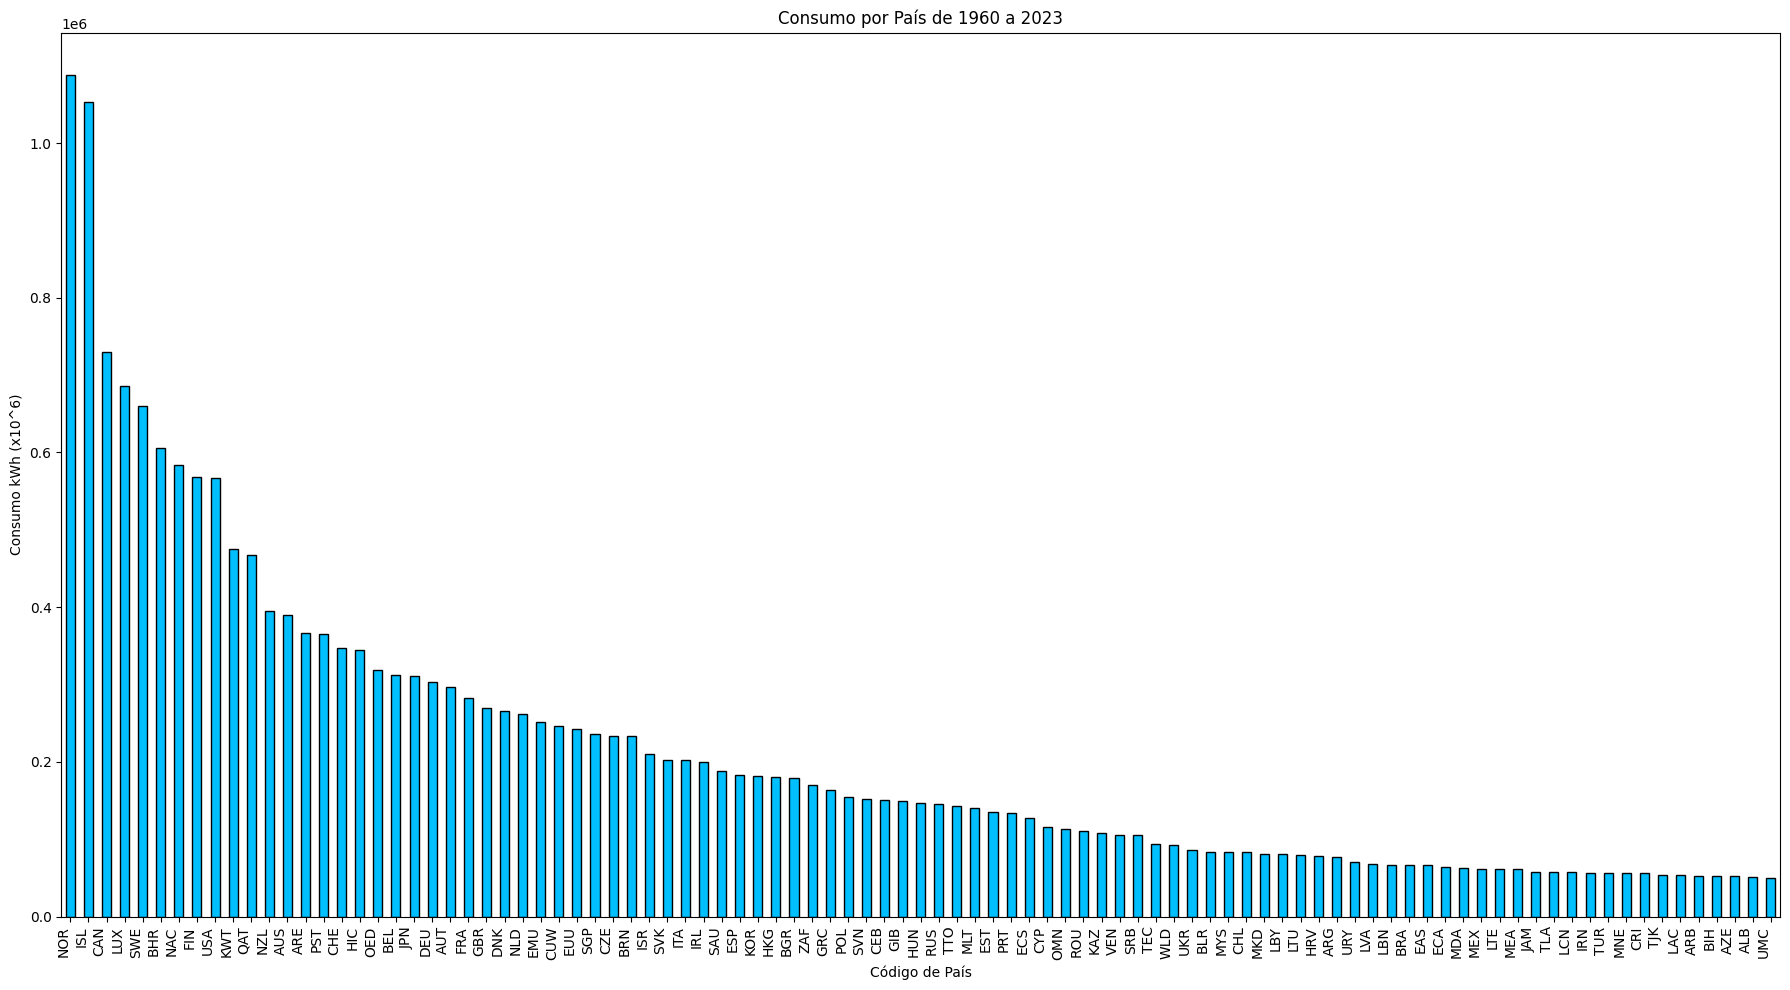

In [24]:
plt.figure(figsize=(18, 10))
df = consumo_paises_1.sort_values(ascending=False) #Organiza los paises de acuerdo a su consumo de mayor a menor
ax = df.iloc[0:95].plot(kind='bar', color='deepskyblue', edgecolor='black')
plt.xticks(rotation=90, ha='right')
plt.title('Consumo por País de 1960 a 2023')
plt.xlabel('Código de País')
plt.ylabel('Consumo kWh (x10^6)')
plt.tight_layout()
plt.show()

### Grafica de consumo per cápita de 1960 a 2023 - 1
- Los dos primeros países (NOR y ISL) presentan un consumo sobresaliente en comparación a los demás países del conjunto de datos.
- A medida que el consumo por país disminuye se va volviendo más uniforme para los países con menor consumo.
- El país con mayor consumo en el periodo de 1960-2023 es NOR (Noruega) superando el millón de kWh.


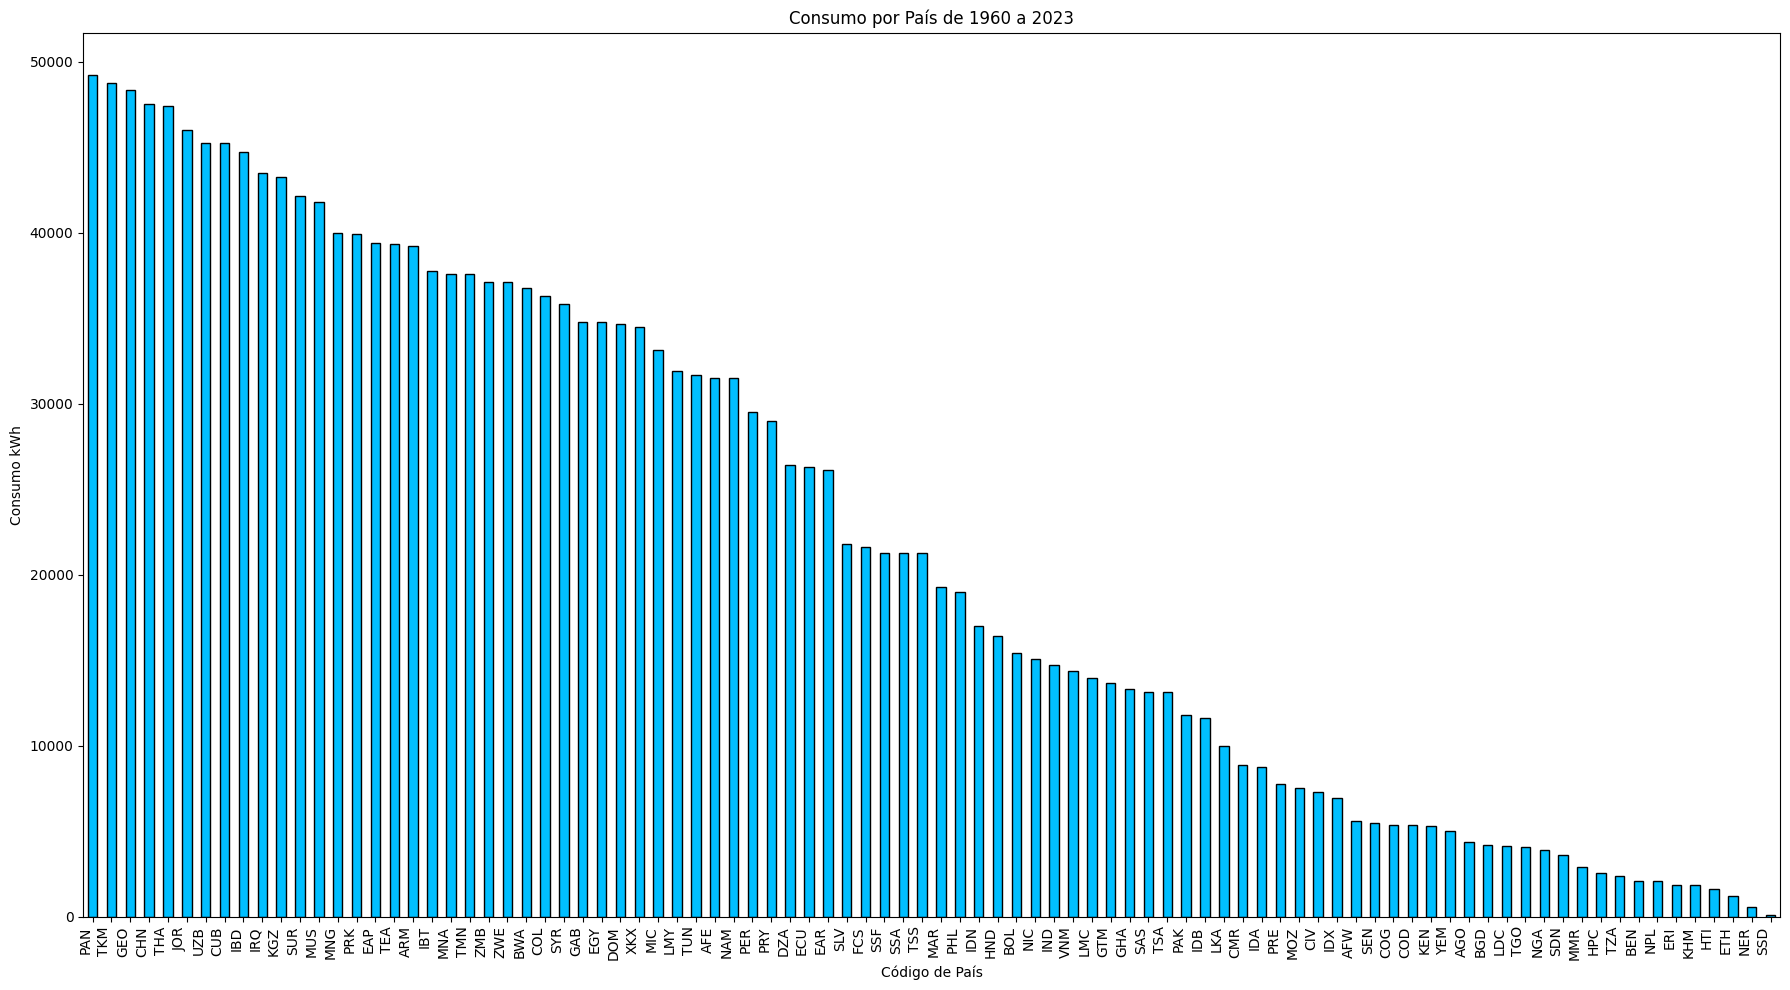

In [25]:
plt.figure(figsize=(18, 10))
ax = df.iloc[95:185].plot(kind='bar', color='deepskyblue', edgecolor='black')
plt.xticks(rotation=90, ha='right')
plt.title('Consumo por País de 1960 a 2023')
plt.xlabel('Código de País')
plt.ylabel('Consumo kWh')
plt.tight_layout()
plt.show()

### Gráfica de consumo per cápita de 1960 a 2023 - 2
- El consumo en esta gráfica presenta una escala mucho menor en comparación a la gráfica anterior, ya que la anterior presentaba millones de kWh, en esta gráfica no alcanzan a llegar a los 50.000 kWh los países con mayor consumo.
- Como se observa la uniformidad de los países con menor consumo se puede deber a que en la gráfica anterior, la escala es mucho más grande, entonces la diferencia entre consumos no se aprecia como en esta gráfica.
- Colombia se encuentra dentro de esta gráfica, por lo que no presenta un consumo significativo en comparación a los países de la primera gráfica.


In [27]:
df[185:266].sum() #Verificando que los últimos 81 registros no generan valor agregado al conjunto de datos

0.0

Ya que la suma de los últimos 81 registros ordenados no genera un valor diferente de 0, se considera eliminarlos del análisis.

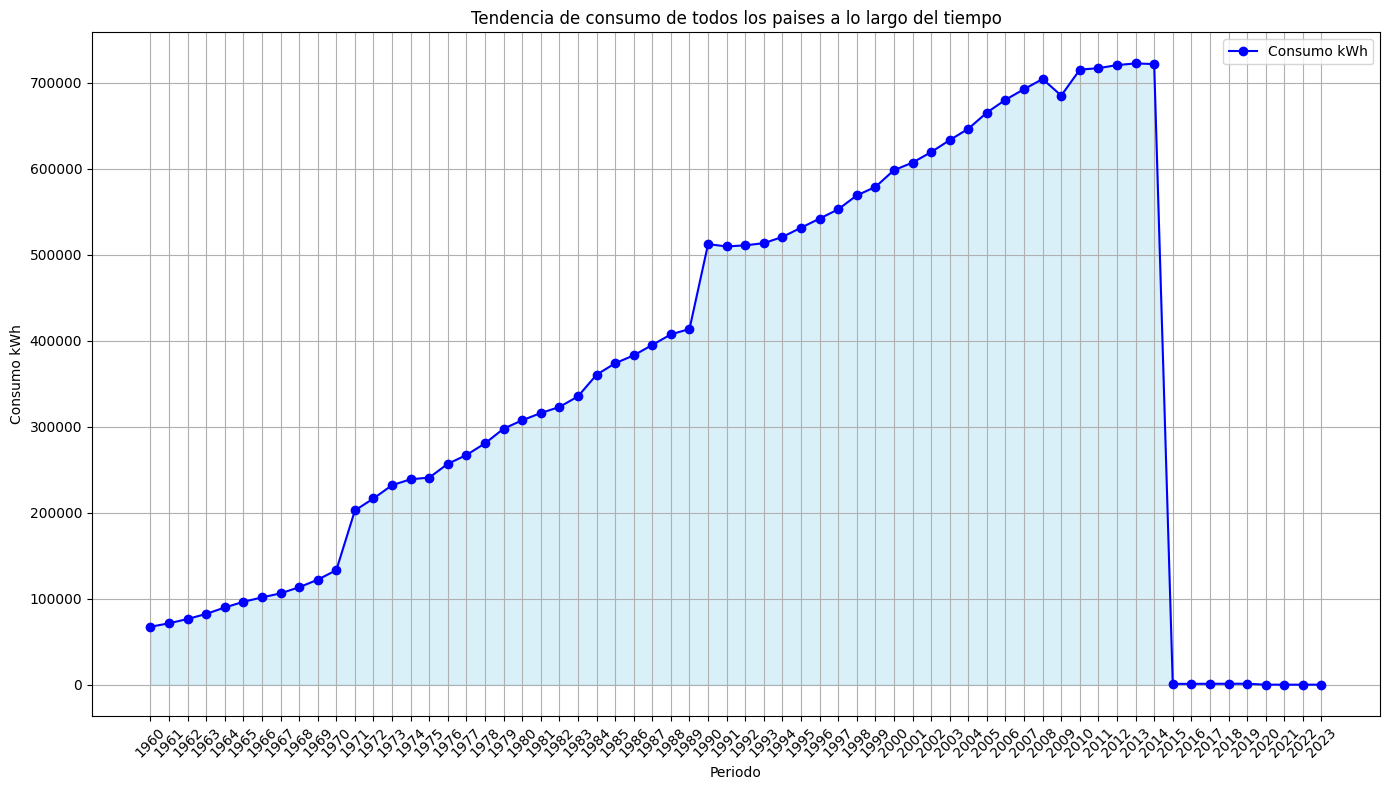

In [28]:
consumo_periodos =consumo1_ds_renombrado.iloc[0:266,4:68].sum(axis=0)

plt.figure(figsize=(14, 8))
plt.plot(consumo_periodos, marker='o', linestyle='-', color='blue', label='Consumo kWh')
plt.fill_between(consumo1_ds_renombrado.columns[4:68].transpose(),consumo_periodos, color='skyblue', alpha=0.3)
#plt.fill_between(consumo1_ds_renombrado.columns[4:68].transpose(), 0, consumo_periodos, where=(consumo1_ds_renombrado.columns[4:68].transpose() < '1971' & consumo1_ds_renombrado.columns[4:68].transpose() > '1970'), color='lightgreen', alpha=0.5, label='1970-1971')
#plt.fill_between(consumo1_ds_renombrado.columns[4:68].transpose(), 0, consumo_periodos, where=(tendencias_temporales['periodo'] >= '2020-01-01'), color='lightcoral', alpha=0.5, label='Desde 2020')
plt.title('Tendencia de consumo de todos los paises a lo largo del tiempo')
plt.xlabel('Periodo')
plt.ylabel('Consumo kWh')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Tendencia de Consumo de 1960 a 2023
- La gráfica muestra dos puntos de incremento considerables del consumo de energía eléctrica. El primero entre los años 1970 y 1971, y el segundo incremento de mayor magnitud entre el año 1989 y 1990.

In [30]:
tend_consumo69 = consumo1_ds_renombrado[consumo1_ds_renombrado['1969'] > 0]
tend_consumo70 = consumo1_ds_renombrado[consumo1_ds_renombrado['1970'] > 0]
tend_consumo71 = consumo1_ds_renombrado[consumo1_ds_renombrado['1971'] > 0]
tend_consumo88 = consumo1_ds_renombrado[consumo1_ds_renombrado['1988'] > 0]
tend_consumo89 = consumo1_ds_renombrado[consumo1_ds_renombrado['1989'] > 0]
tend_consumo90 = consumo1_ds_renombrado[consumo1_ds_renombrado['1990'] > 0]
print('Registros con consumo mayor a 0 en el año 1969: ' , tend_consumo69.shape[0])
print('Registros con consumo mayor a 0 en el año 1970: ' , tend_consumo70.shape[0])
print('Registros con consumo mayor a 0 en el año 1971: ' , tend_consumo71.shape[0])
print('Registros con consumo mayor a 0 en el año 1988: ' , tend_consumo88.shape[0])
print('Registros con consumo mayor a 0 en el año 1989: ' , tend_consumo89.shape[0])
print('Registros con consumo mayor a 0 en el año 1990: ' , tend_consumo90.shape[0])

Registros con consumo mayor a 0 en el año 1969:  32
Registros con consumo mayor a 0 en el año 1970:  32
Registros con consumo mayor a 0 en el año 1971:  151
Registros con consumo mayor a 0 en el año 1988:  153
Registros con consumo mayor a 0 en el año 1989:  153
Registros con consumo mayor a 0 en el año 1990:  176


Se observa que el aumento del consumo en esos dos periodos se debe al aumento considerable de nuevos registros que se generaron. Es decir, se recolectaron datos de consumo en más países en el año 1971 en comparación al año 1970, y lo mismo aplica para el año 1990. Esto generó un incremento en la tendencia de consumo según el conjunto de datos.

In [31]:
consumo_2015 = consumo1_ds_renombrado.iloc[0:266,58:68].sum(axis=0)
consumo_2015

2014    721402.987579
2015       910.000000
2016       956.000000
2017      1021.000000
2018      1064.000000
2019      1084.000000
2020         0.000000
2021         0.000000
2022         0.000000
2023         0.000000
dtype: float64

A partir del año 2015 el consumo tiene una caída significativa de los datos lo cual nos indica que aunque el conjunto registra fechas de 1960 a 2023, el consumo total no fue registrado para los años de 2015 en adelante ya que el consumo de energía eléctrica no se vio afectado a partir de ese año.

In [32]:
filtered_df = consumo1_ds_renombrado[consumo1_ds_renombrado['2015'] > 0]
filtered_df

,Pais,Cod_Pais,Unidad,Cod_Unidad,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
106,Indonesia,IDN,Consumo de energía eléctrica (kWh per cápita),EG.USE.ELEC.KH.PC,0.0,0.0,0.0,0.0,0.0,0.0,...,808.418972,910,956,1021,1064,1084,0,0,0,0


El único país en el que se observan registros después de 2014 hasta 2019 es Indonesia. Por lo que del 2020 en adelante no se registran los consumos para ninguno de los países del dataset.

In [33]:
df_copy = df.copy()
top_6_paises = df_copy.head(6)

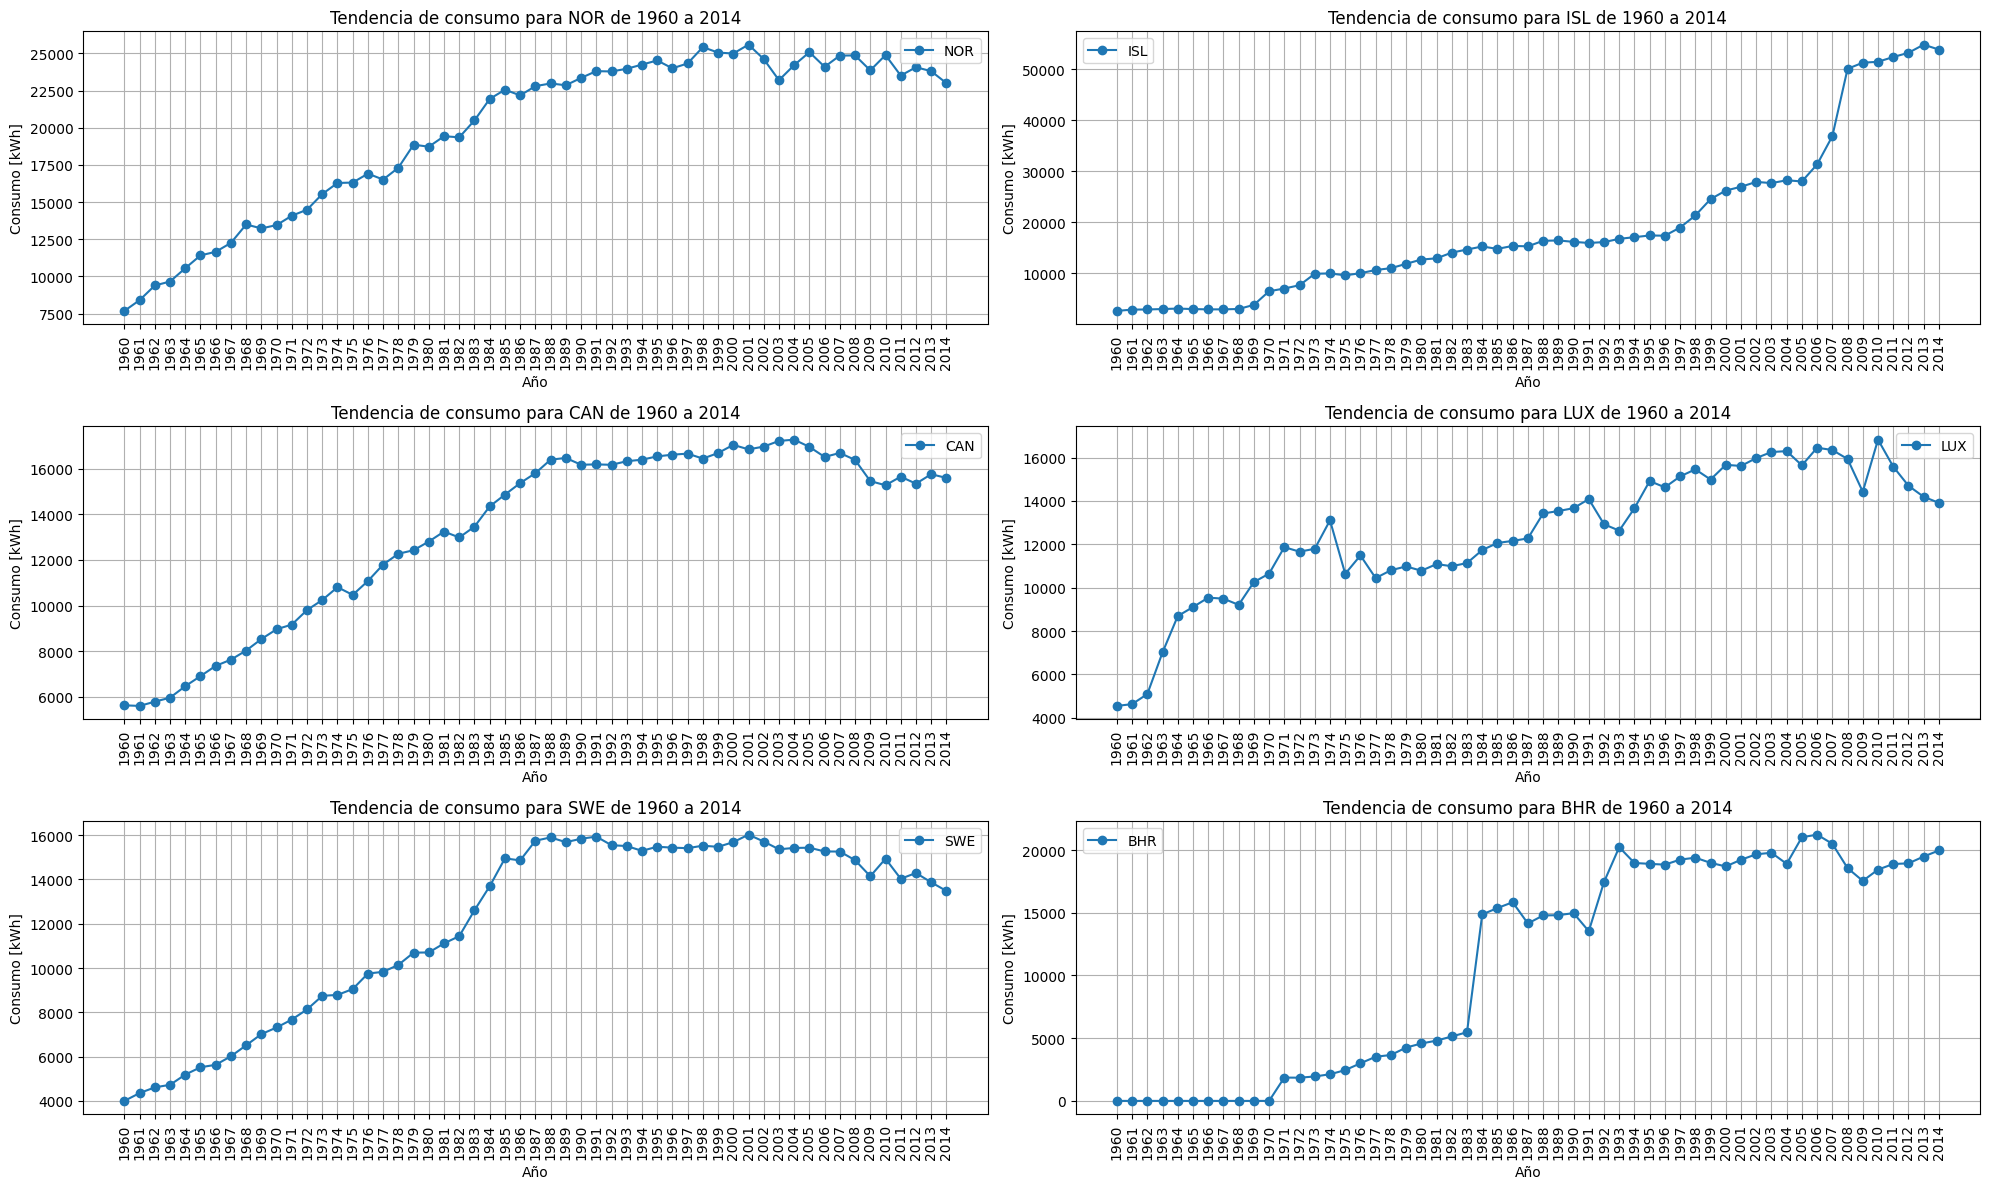

In [34]:
plt.figure(figsize=(20, 12))

for i, pais in enumerate(top_6_paises.index, 1):
    pais_data = consumo1_ds_renombrado[consumo1_ds_renombrado['Cod_Pais'] == pais].copy()
# Subgráfica individual para cada país
    plt.subplot(3, 2, i)
    plt.plot(pais_data.columns[4:59], pais_data.iloc[0,4:59], marker='o', linestyle='-', label=pais)
    plt.title(f'Tendencia de consumo para {pais} de 1960 a 2014')
    plt.xlabel('Año')
    plt.ylabel('Consumo [kWh]')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend()
plt.tight_layout()
plt.show()

### Tendencia de consumo (Países con mayor consumo de 1960 a 2014)
- Noruega, Canadá y Suecia presentan un comportamiento similar. Noruega presenta el mayor pico de consumo superando los 25.000 kWh
- Islandia presenta un crecimiento más constante, con un crecimiento acelerado de 2005 a 2008, siendo el país con mayor consumo en el año 2014
- Luxemburgo y Bahrein presentan el crecimiento menos uniforme presentando picos repentinos de consumo o descensos de consumo

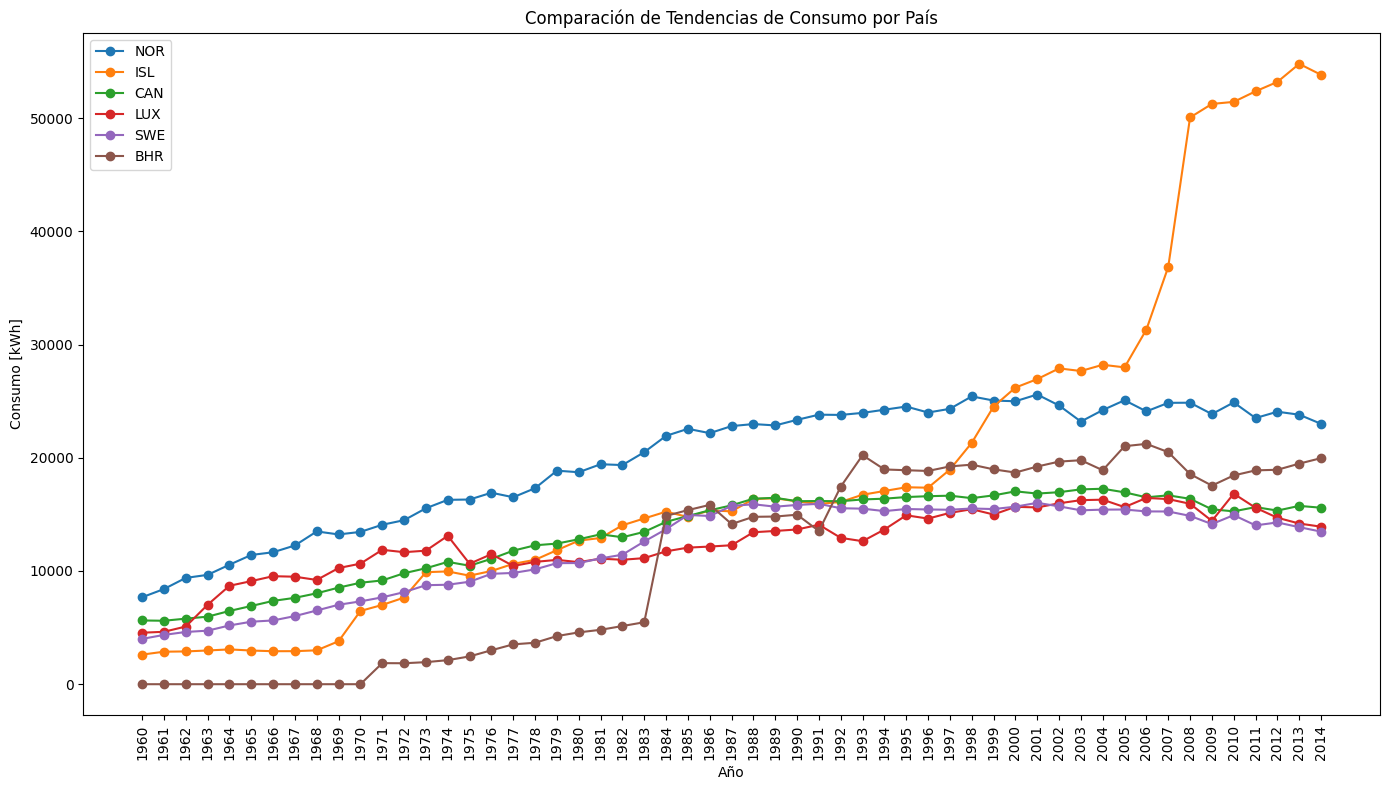

In [35]:
plt.figure(figsize=(14, 8))
for pais in top_6_paises.index:
    pais_data = consumo1_ds_renombrado[consumo1_ds_renombrado['Cod_Pais'] == pais].copy()
    plt.plot(pais_data.columns[4:59], pais_data.iloc[0,4:59], marker='o', linestyle='-', label=pais)
    plt.title('Comparación de Tendencias de Consumo por País')
plt.xlabel('Año')
plt.ylabel('Consumo [kWh]')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Comparación de tendencias de países con mayor consumo per cápita
Como se observa Islandia es el país que más sobresale a partir del 2005. Por varias fuentes, se sabe que Islandia presenta unas condiciones ambientales particulares para producción de energía eléctrica renovable, lo cual puede ser un factor considerable para que la energía producida quiera ser aprovechada por industrias que quieran reducir su huella de carbono.

[Wikipedia - Energía en Islandia](https://es.wikipedia.org/wiki/Energ%C3%ADa_en_Islandia#:~:text=Islandia%20es%20el%20primer%20pa%C3%ADs,10%20veces%20m%C3%A1s%20que%20Espa%C3%B1a)

[ielektro - Consumo energetico Islandia](https://ielektro.es/2022/03/22/islandia-mayor-consumo-electrico-per-capita/)

[Crónica ONU - Consumo energetico Islandia](https://www.un.org/es/chronicle/article/la-historia-de-la-energia-sostenible-en-islandia-un-modelo-para-el-mundo)

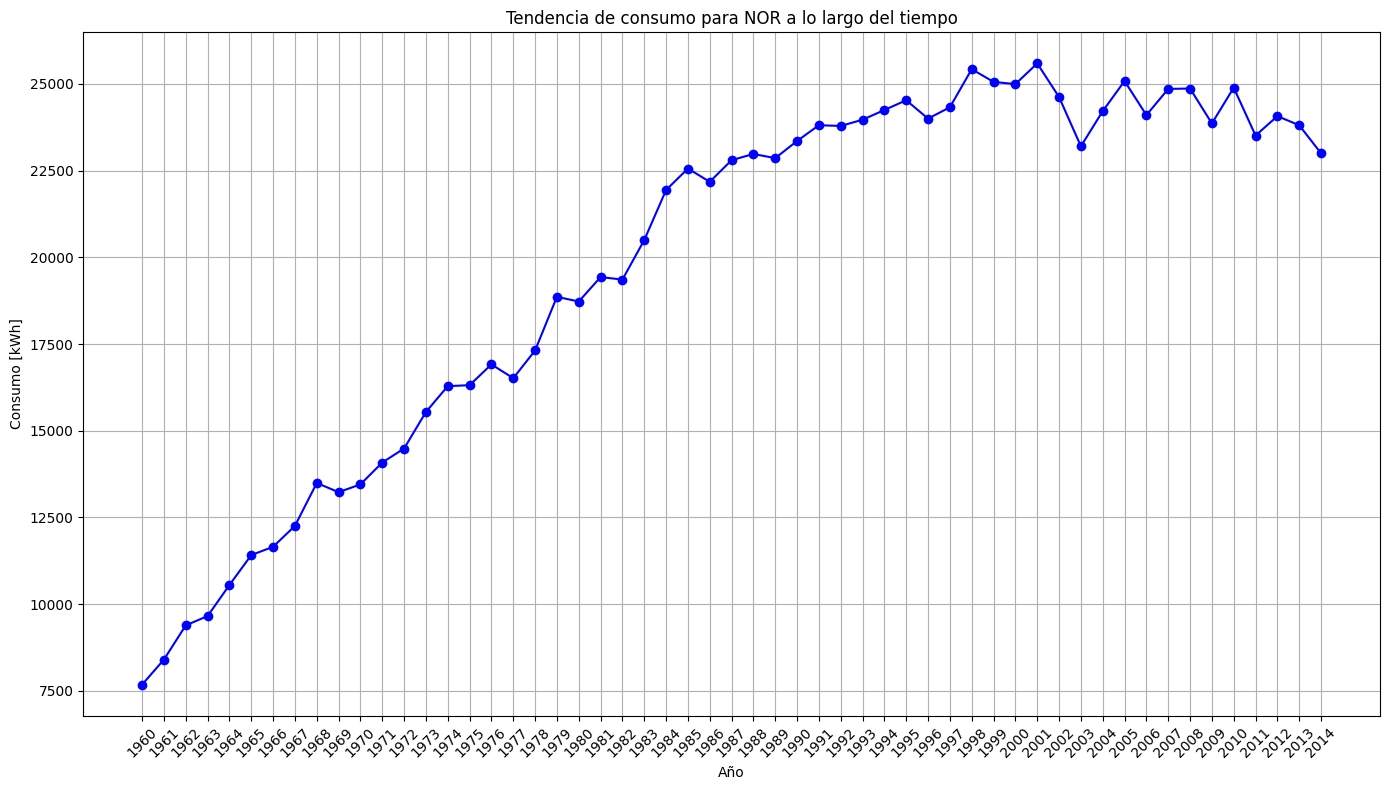

In [36]:
nor_data = consumo1_ds_renombrado[consumo1_ds_renombrado['Cod_Pais'] == 'NOR'].copy()
plt.figure(figsize=(14, 8))
plt.plot(nor_data.columns[4:59], nor_data.iloc[0,4:59], marker='o', linestyle='-', color='b')
plt.title('Tendencia de consumo para NOR a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Consumo [kWh]')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Consumo del país con mayor consumo del período de 1960 a 2019 (Noruega)
- Noruega presenta un crecimiento más pronunciado desde 1960 a 1995, lo cual le permite sumar mayor consumo a lo largo del período de estudio, pero luego presenta menor crecimiento en su consumo en comparación a otros países.


In [37]:
print(df.iloc[0:185].describe())

count    1.850000e+02
mean     1.209399e+05
std      1.754833e+05
min      1.202441e+02
25%      2.125259e+04
50%      5.217414e+04
75%      1.493299e+05
max      1.088009e+06
dtype: float64


La media del consumo total en el mundo para el periodo de 1960 a 2019 es de 120939.9 kWh.
La desviación no se tiene en cuenta ya que no representa un valor de interes por lo que no tenemos un valor especifico a seguir. El consumo de energía esta en constante crecimiento y depende de cada país.

In [38]:
latino = pd.Index(['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'CRI', 'CUB', 'DOM', 'ECU', 'SLV', 'GTM', 'HTI', 'HND', 'MEX', 'NIC', 'PAN', 'PRY', 'PER', 'PRI', 'URY', 'VEN'])

ds = df.iloc[0:21].copy()
cont = 0
for pais in latino:
    ds.iloc[cont] = df[df.index == pais].copy()
    cont += 1

ds = ds.set_axis(latino)
ds = ds.sort_values(ascending=False)

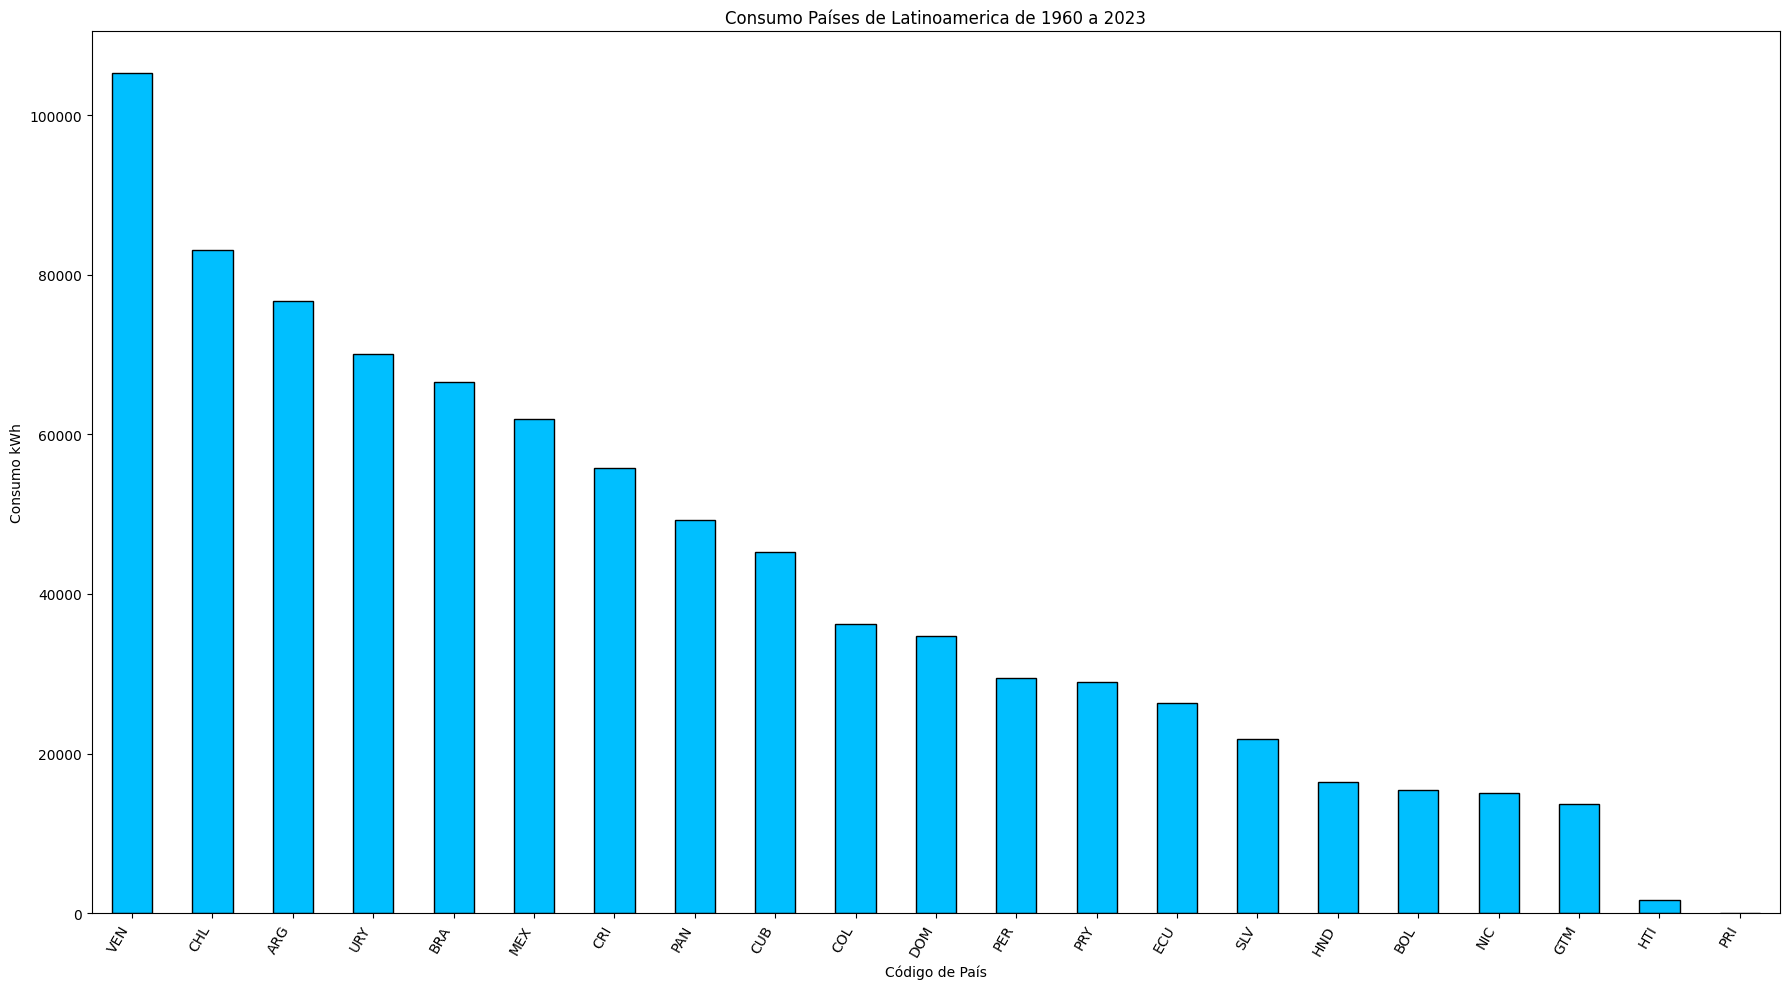

In [40]:
plt.figure(figsize=(18, 10))
ax = ds.plot(kind='bar', color='deepskyblue', edgecolor='black')
plt.xticks(rotation=60, ha='right')
plt.title('Consumo Países de Latinoamérica de 1960 a 2023')
plt.xlabel('Código de País')
plt.ylabel('Consumo kWh')
plt.tight_layout()
plt.show()

In [41]:
print(ds.describe())

count        21.000000
mean      40638.421038
std       28501.667921
min           0.000000
25%       16404.572558
50%       34676.817098
75%       61896.785506
max      105246.110352
dtype: float64


### Consumo energía per cápita países de Latinoamérica
- El país de Latinoamérica que más consume energía per cápita es Venezuela.
- El país que menos consume es Haití.
- De Puerto Rico no se tienen registros de consumo.
- Colombia se encuentra por debajo de la media de consumo per cápita dentro de los países de Latinoamérica.


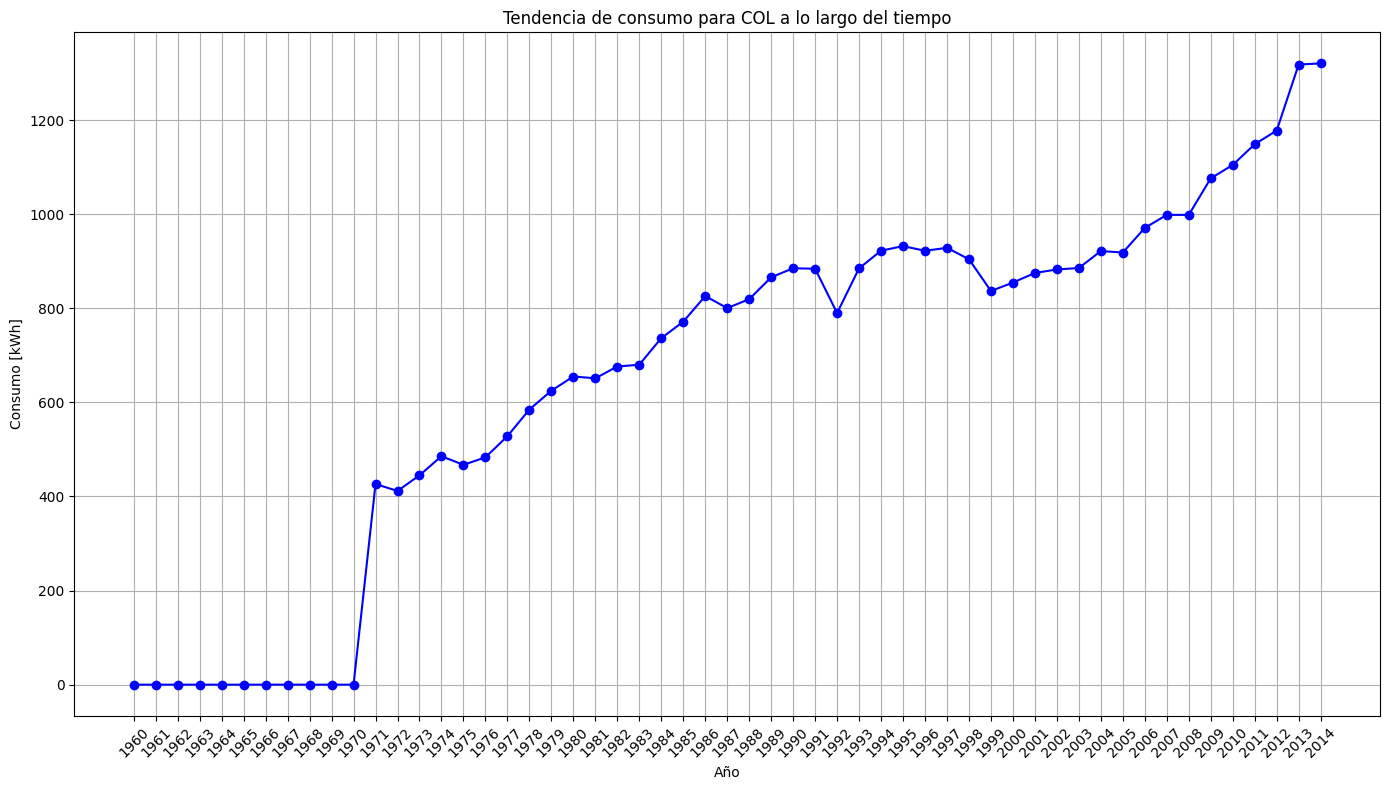

In [42]:
col_data = consumo1_ds_renombrado[consumo1_ds_renombrado['Cod_Pais'] == 'COL'].copy()
plt.figure(figsize=(14, 8))
plt.plot(col_data.columns[4:59], col_data.iloc[0,4:59], marker='o', linestyle='-', color='b')
plt.title('Tendencia de consumo para COL a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Consumo [kWh]')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Consumo de energía en Colombia
- Los registros en el dataset comienzan a partir de 1971.
- En comparación a los países con mayor consumo, Colombia no presenta consumos significativos que se puedan comparar con un país como Noruega.
- Colombia ha presentado un incremento en el consumo con pequeñas fluctuaciones, manteniendo un incremento en el consumo.
- Se observa que en 1992 se presentó una caída significativa en el consumo. Dentro de noticias encontradas, en el 92 Colombia atravesó una fuerte crisis energética provocada por el fenómeno de El Niño, por lo que esto pudo generar el cambio significativo dentro del registro de Colombia. Para mayor información dirigirse al siguiente [link](https://www.canalinstitucional.tv/apagon-92-por-que-quitaron-luz-hora-gaviria#:~:text=En%20el%20a%C3%B1o%201992%2C%20durante,de%20energ%C3%ADa%20hidroel%C3%A9ctrica%20bajaran%20considerablemente.)

## Conclusiones Generales


- El conjunto de datos inicial contiene pocos valores nulos, y no tiene duplicados, lo cual permitió ahorrar tiempo en la limpieza de los datos. Sin embargo, se presentaron muchos registros con valor 0 para varios países, lo cual nos indica que no se registraron muchos datos del dataset.
- Hay 81 países que no presentan valores para el periodo de estudio, y otros países no tienen registros completos para algunos años, ya que el registro es sobre países no pertenecientes a la OCDE (que es un organismo de cooperación internacional cuyo objetivo es coordinar sus políticas económicas y sociales), puede que los países que no se registraron valores de consumo hayan formado parte de la OCDE o en cierto año pasaran a ser parte de la OCDE lo cual ya no es necesario el registro dentro de este dataset.
- Ya que se presentan cambios en la cantidad de registros en algunos años, no queda claro porque no se tuvo en cuenta el registro de ciertos países (como Colombia), antes de ciertos años (1971 y 1990).
- El dataset presenta datos de consumo per cápita, es decir consumo por cada habitante dentro del país registrado, pero no se tiene claro si también puede llegar a ser afectado por el consumo industrial el cual puede llegar a implicar venta de generación de energía entre países.
- Colombia presenta registros desde 1971 hasta 2014, pero según la página de la OCDE, Colombia forma parte de la OCDE desde el año 2020, por lo que el dataset debería tener registros del año 2015 al 2019 para Colombia.
